Задачи исследования
1. Осмотр данных
   - посмотрим начало и конец датасета
   - сделаем предварительные выводы
   - поищем аномалии


2. Обработка данных
   - найти и обработать пропуски
   - заменить некорректные типы данных
   - удалить дубликаты
   - выделить леммы


3. Ответы на вопросы
   - Есть ли зависимость между наличием детей и возвратом кредита в срок?
   - Есть ли зависимость между семейным положением и возвратом кредита в срок?
   - Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
   - Как разные цели кредита влияют на его возврат в срок?


4. Результаты исследования
   - Общие выводы
   - Рекомендации

Признаки:
- children - количество детей у заемщика
- days_employed - кличество дней стажа
- dob_years - количестов лет заемщику
- education_id - образование
- family_status - наличие брака
- family_status_id - налибие брака
- gender - пол
- income_type - рабочий статус
- debt - имел ли задолжность по возврату кредита
- total_income - месячный доход заемщика
- purpose - причина приобретения кредита

In [262]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

In [263]:
df = pd.read_csv('preprocessing_project.csv')
df.sample(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
5061,2,-1374.398893,47,высшее,0,женат / замужем,0,F,сотрудник,0,37645.460469,заняться образованием
7128,0,354446.489307,53,среднее,1,гражданский брак,1,F,пенсионер,0,88811.582459,сделка с автомобилем
11585,1,-535.730705,45,среднее,1,женат / замужем,0,M,сотрудник,0,147661.772011,на покупку подержанного автомобиля
3197,0,-1598.597777,54,среднее,1,женат / замужем,0,M,компаньон,0,194892.625261,покупка жилья
1642,2,NaN,56,высшее,0,Не женат / не замужем,4,F,сотрудник,0,NaN,покупка жилой недвижимости


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [265]:
df.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [266]:
df.duplicated().sum()

54

In [267]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


Вывод:
    - присутствуют пропущенные значения в признаках days_employes (стаж работы) и total_income (месячный доход заемщика), причем значение одинаково, может это связано с тем, что это молодые люди еще нигде не работавшие, либо работавшие, но не официально, либо некорректно выгруженные данные;
    - присутсвуют дубликаты (54);
    - в признаке children максимальное значение достигает 20 детей (сомнительно, что у кого-то заемщика есть 20 детей);
    - минимальный возраст заемщиков 0 (еще не родился, а кредит уже приобрел);
    - некорректный тип данных в дня стажа работы, необходимо будет изменить на целочисленный тип данных;
    - различный регистр в строках признака education;
    - присутствуют дублирующие признаки:
       - education - education_id;
       - family_status_id - family_status_id;
       избавимся от идентификаторов;

In [268]:
# удалим дублирующиеся признаки
df = df.drop(['education_id', 'family_status_id'], axis=1)

In [269]:
df.sample(5)

,children,days_employed,dob_years,education,family_status,gender,income_type,debt,total_income,purpose
2927,0,-190.960386,56,СРЕДНЕЕ,женат / замужем,M,сотрудник,0,202579.113117,покупка жилья для семьи
8687,0,-1642.163005,42,высшее,женат / замужем,M,компаньон,0,192470.271754,строительство недвижимости
10599,0,332430.791349,62,среднее,гражданский брак,F,пенсионер,0,56821.829337,свой автомобиль
5680,1,-600.176402,40,ВЫСШЕЕ,гражданский брак,F,компаньон,0,76249.101286,профильное образование
7512,0,357097.366281,57,Среднее,Не женат / не замужем,F,пенсионер,0,78957.667177,высшее образование


In [270]:
# заменим пропущенные значения, 
# так как не ясна причина некорректности данных (на дальнейший анализ это повлиять не должно)
df['days_employed'] = df['days_employed'].fillna(0)

In [271]:
df['total_income'] = df['total_income'].fillna(0)

In [272]:
df.isnull().sum()

children         0
days_employed    0
dob_years        0
education        0
family_status    0
gender           0
income_type      0
debt             0
total_income     0
purpose          0
dtype: int64

In [273]:
# дублирующиеся значения это явно сбой при валидации данных на сервере, поэтому просто их удалим
# данные могут быть идентичными по тем или иным признакам, но иметь разный идентификатор
df = df.drop_duplicates().reset_index(drop=True)

In [274]:
df.duplicated().sum()

0

In [275]:
# посмотрим на уникальные значения признака
# -1 ребенок это опять-таки ошибка валидации данных, поменяем это значение на 1
# 20 - скорее всего тоже ошибка при валидации или заполнении формы на получения кредита (хотели указать 2, но указали 20)
df.children.unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

In [276]:
for el in df['children']:
    if el == -1:
        df['children'].replace(el, 1, inplace=True)

In [277]:
df.children.unique()

array([ 1,  0,  3,  2,  4, 20,  5])

In [278]:
# 20 детей, по нашим данным, имеют 76 человек и это явная ошибка (я поверил бы, если бы был 1-2, 
# конечно может быть и такое, что у банка существует какая-то льготная программа для лиц с количеством детей > 20,
# но нет)
# поэтому меняем значение 20 на 2
df.children.value_counts()

0     14107
1      4856
2      2052
3       330
20       76
4        41
5         9
Name: children, dtype: int64

In [279]:
for el in df['children']:
    if el == 20:
        df['children'].replace(el, 2, inplace=True)

In [280]:
df.children.unique()

array([1, 0, 3, 2, 4, 5])

In [281]:
# преобразуем отрицательные значения
df['days_employed'] = df['days_employed'].abs()

In [282]:
max_days_of_employment = (df['dob_years'].max() - 18) * 365
max_days_of_employment # получим количество дней, по которым можно сделать отсев

20805

In [283]:
count_max_days_of_employmen = df[df['days_employed'] > max_days_of_employment]['days_employed'].count()
count_max_days_of_employmen/len(df)*100
# Почти 16% значений это лица, у которых трудовой стаж превышает максимально возможный и это достаточно большой показатель

16.044897769083878

In [284]:
df['years_employed'] = df['days_employed']/ 365
df['years_employed'] = df['years_employed'].astype('int')

In [285]:
df = df.drop(['days_employed'], axis=1)

In [286]:
df.sample(5)

,children,dob_years,education,family_status,gender,income_type,debt,total_income,purpose,years_employed
2510,2,59,высшее,вдовец / вдова,F,сотрудник,0,264474.835577,операции с коммерческой недвижимостью,7
2053,1,59,среднее,женат / замужем,M,сотрудник,0,168242.453293,сделка с подержанным автомобилем,3
14801,1,29,ВЫСШЕЕ,женат / замужем,F,компаньон,0,143176.590048,автомобиль,0
978,3,28,среднее,гражданский брак,F,сотрудник,0,0.000000,ремонт жилью,0
15680,0,36,среднее,гражданский брак,F,сотрудник,0,93410.696558,операции с коммерческой недвижимостью,0


In [287]:
df_max_years_employed = df.query('years_employed > 57')

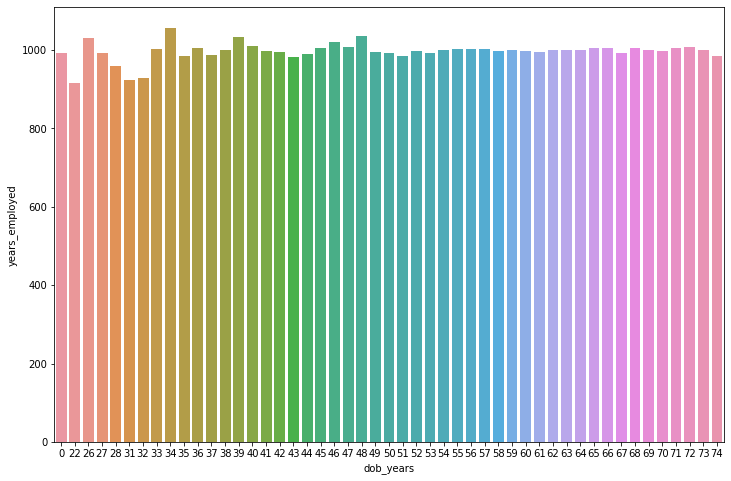

In [288]:
sns.barplot(x = df_max_years_employed.dob_years, y = df_max_years_employed.years_employed, ci=None)
plt.show()

Вывод:
- на протяжении всего возрастного диапозона трудовой стаж значительно превышен;
- для лиц, чей трудовой стаж превышает 57 лет, рассчитаем стаж в соотвествии с их возрастом. Для этого разобъем лиц на возрастные диапазоны, высчитаем среднее в этом диапазоне и отнимем от полученного числа 18:
  - 20-25 (5)
  - 26-30 (10)
  - 31-35 (15)
  - 36-40 (20)
  - 41-45 (25)
  - 46-50 (30)
  - 51-55 (35)
  - 56-60 (40)
  - 61-65 (45)
  - 66-70 (50)
  - 71-75 (55)

In [289]:
# сделаем выборку заемщиков чей стаж превышает 57 лет
df_many_years_employed = df.query('years_employed > 57')

In [290]:
# в соответствии с возрастным диапозоном присвоим значение их трудового стажа  
for el in df_many_years_employed['dob_years']:
    if  20 <= el <= 25:
        df_many_years_employed['years_employed'] = 5
    elif 26 <= el <= 30:
        df_many_years_employed['years_employed'] = 10
    elif 31 <= el <= 35:
        df_many_years_employed['years_employed'] = 15
    elif 36 <= el <= 40:
        df_many_years_employed['years_employed'] = 20
    elif 41 <= el <= 45:
        df_many_years_employed['years_employed'] = 25
    elif 46 <= el <= 50:
        df_many_years_employed['years_employed'] = 30
    elif 51 <= el <= 55:
        df_many_years_employed['years_employed'] = 35
    elif 56 <= el <= 60:
        df_many_years_employed['years_employed'] = 40
    elif 61 <= el <= 65:
        df_many_years_employed['years_employed'] = 45
    elif 66 <= el <= 70:
        df_many_years_employed['years_employed'] = 50
    elif 71 <= el <= 75:
        df_many_years_employed['years_employed'] = 55

<ipython-input-290-dde5388962e1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_many_years_employed['years_employed'] = 35
<ipython-input-290-dde5388962e1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_many_years_employed['years_employed'] = 40
<ipython-input-290-dde5388962e1>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [291]:
# посмотрим размер нашего фрэйма, чтобы не потерять данные
df.shape

(21471, 10)

In [292]:
# удалим соответствующие данные 
df = df.drop(np.where(df['years_employed'] > 57)[0])

In [293]:
# посмотрим размер данных после удаления 
df.shape

(18026, 10)

In [294]:
# посмотрим размер данных, которые видоизменили и которые необходимо смержить 
df_many_years_employed.shape

(3445, 10)

In [295]:
df = df.merge(df_many_years_employed, how='outer')

In [296]:
# данные не потерялись
df.shape

(21471, 10)

In [297]:
# так как в признаках education и family_status есть значения разного регистра, 
# приведем все значения к нижнему регистру
df['education'] = df['education'].str.lower()

In [298]:
df.education.value_counts()

среднее                15188
высшее                  5251
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

In [299]:
df['family_status'] = df['family_status'].str.lower()

In [300]:
df.family_status.value_counts()

женат / замужем          12344
гражданский брак          4163
не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64

In [301]:
# С данным признаком все впорядке
df.income_type.value_counts()

сотрудник          11091
компаньон           5080
пенсионер           3837
госслужащий         1457
безработный            2
предприниматель        2
в декрете              1
студент                1
Name: income_type, dtype: int64

In [302]:
df.gender.value_counts()

F      14189
M       7281
XNA        1
Name: gender, dtype: int64

In [303]:
# трудно сказать какой пол у этого заемщка (по крайней мере по имеющимся данным), учитывая, что в современном мире
# довольно актуально смена пола и т.п.
df[df['gender']=='XNA']

,children,dob_years,education,family_status,gender,income_type,debt,total_income,purpose,years_employed
8976,0,24,неоконченное высшее,гражданский брак,XNA,компаньон,0,203905.157261,покупка недвижимости,6


In [304]:
# округлим доходы наших заемщиков до двух знаков после запятой
df['total_income'] = round(df['total_income'], 2)

In [305]:
# проведем лемматизацию с использованием библиотеки Яндекса MyStem
# и с использованием библеотеки Counter посчитаем количество повторений слов
unique_credit_purposes = df['purpose'].unique().tolist()
unique_credit_purposes

['покупка жилья',
 'приобретение автомобиля',
 'дополнительное образование',
 'операции с жильем',
 'образование',
 'на проведение свадьбы',
 'покупка жилья для семьи',
 'покупка недвижимости',
 'покупка коммерческой недвижимости',
 'сыграть свадьбу',
 'покупка жилой недвижимости',
 'строительство собственной недвижимости',
 'недвижимость',
 'строительство недвижимости',
 'на покупку своего автомобиля',
 'на покупку подержанного автомобиля',
 'строительство жилой недвижимости',
 'жилье',
 'операции со своей недвижимостью',
 'автомобили',
 'заняться образованием',
 'сделка с подержанным автомобилем',
 'получение образования',
 'автомобиль',
 'свадьба',
 'получение дополнительного образования',
 'покупка своего жилья',
 'операции с недвижимостью',
 'получение высшего образования',
 'операции с коммерческой недвижимостью',
 'свой автомобиль',
 'сделка с автомобилем',
 'профильное образование',
 'высшее образование',
 'на покупку автомобиля',
 'покупка жилья для сдачи',
 'ремонт жилью',
 '

In [306]:
string = '; '.join(unique_credit_purposes)

In [307]:
from pymystem3 import Mystem
m = Mystem()
lemmas = m.lemmatize(string)

from collections import Counter
c = Counter()
for w in lemmas:
    c[w]+=1
c = dict(c)
sorted_by_value = sorted(c.items(), key=lambda kv: kv[1])
sorted_by_value

[('приобретение', 1),
 ('проведение', 1),
 ('семья', 1),
 ('сыграть', 1),
 ('собственный', 1),
 ('со', 1),
 ('профильный', 1),
 ('сдача', 1),
 ('ремонт', 1),
 ('\n', 1),
 ('дополнительный', 2),
 ('для', 2),
 ('коммерческий', 2),
 ('жилой', 2),
 ('подержать', 2),
 ('заниматься', 2),
 ('сделка', 2),
 ('свадьба', 3),
 ('строительство', 3),
 ('получение', 3),
 ('высокий', 3),
 ('операция', 4),
 ('на', 4),
 ('свой', 4),
 ('с', 5),
 ('жилье', 7),
 ('автомобиль', 9),
 ('образование', 9),
 ('покупка', 10),
 ('недвижимость', 10),
 ('; ', 37),
 (' ', 59)]

Вывод:
    - чаще всего кредиты берут на приобретение:
        - недвижимости
        - образования
        - автомобиля
        - жилья

### Есть ли зависимость между наличием детей и возвратом кредита в срок?

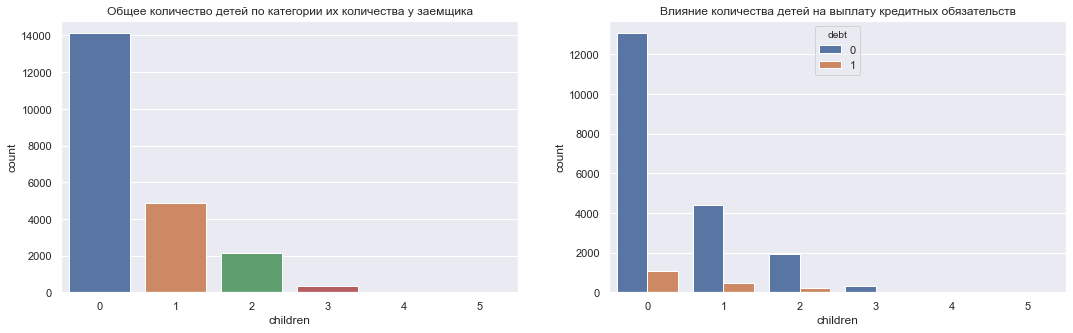

In [381]:
f, ax = plt.subplots(1,2, figsize = (18,5))

sns.countplot('children', data = df, ax=ax[0])
ax[0].set_title('Общее количество детей по категории их количества у заемщика')

sns.countplot('children', hue = 'debt', data = df, ax=ax[1])
ax[1].set_title('Влияние количества детей на выплату кредитных обязательств')
plt.show()

In [309]:
children_pivot = df.pivot_table(index = ['children'], \
                                columns = ['debt'], \
                                values = 'purpose', aggfunc='count')

children_pivot['ratio'] = children_pivot[1] / children_pivot[0] * 100
children_pivot

debt,0,1,ratio
children,,,
0,13044.0,1063.0,8.149341
1,4411.0,445.0,10.088415
2,1926.0,202.0,10.488058
3,303.0,27.0,8.910891
4,37.0,4.0,10.810811
5,9.0,NaN,NaN


Вывод:
- бездетные отдают кредиты хуже, это может быть связано с тем, что, как правило, молодые люди являются бездетными, те, кто находится только в начале своего финансового пути

In [333]:
childfree = df.query('children==0')

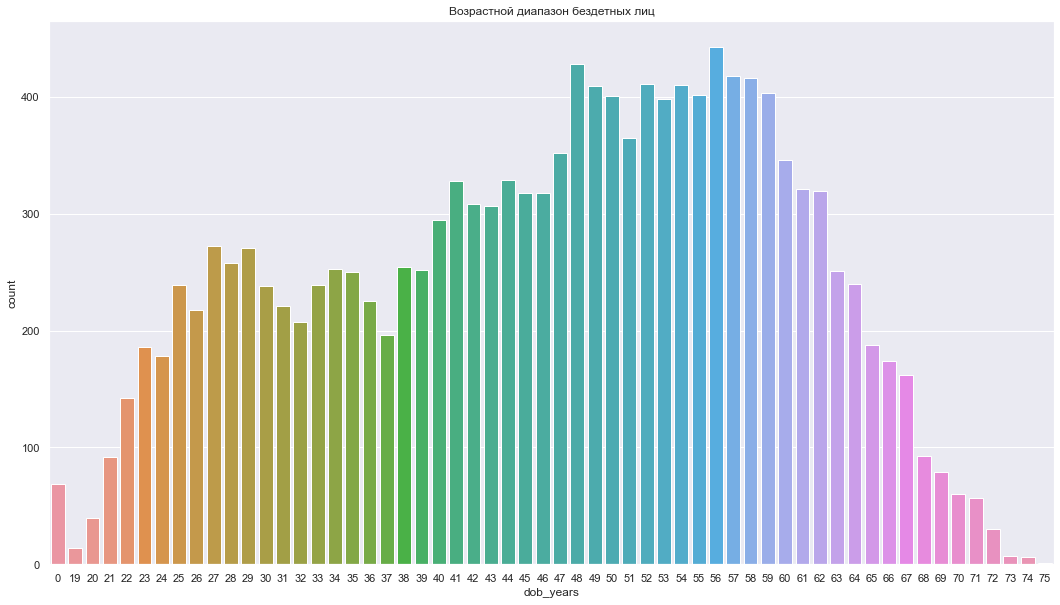

In [340]:
sns.set(rc={'figure.figsize': (18,10)})
sns.countplot('dob_years', data = childfree)
plt.title('Возрастной диапазон бездетных лиц')
plt.show()

Вывод:
- и так, мои предположения, что зачастую бездетными являются молодые люди оказались ложными - наибольшая часть бездетных оказалась люди с возрастом от 40-60 лет;

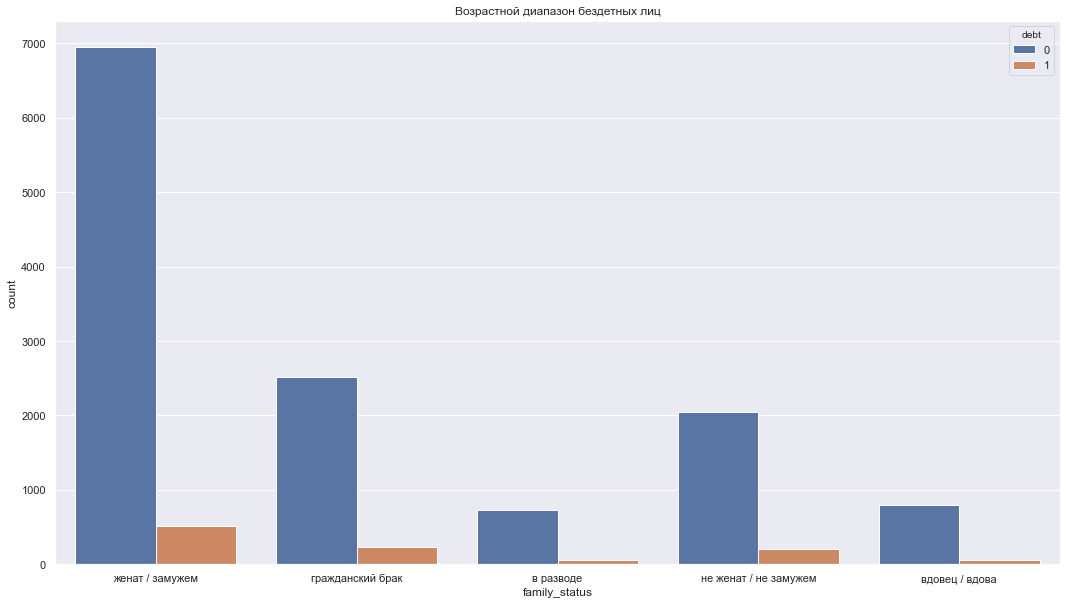

In [342]:
sns.set(rc={'figure.figsize': (18,10)})
sns.countplot('family_status', hue = 'debt', data = childfree)
plt.title('Возрастной диапазон бездетных лиц')
plt.show()

Вывод:
    - так же никоим образом не влиет семейное положение на бездетные семьи и их кредитный возврат;

In [350]:
childfree_pivot = childfree.pivot_table(index = ['dob_years'], \
                                columns = ['debt'], \
                                values = 'purpose', aggfunc='count')

childfree_pivot['ratio'] = childfree_pivot[1] / childfree_pivot[0] * 100
childfree_pivot.sort_values('ratio').head(10)

debt,0,1,ratio
dob_years,,,
61,312.0,9.0,2.884615
66,167.0,7.0,4.191617
63,240.0,11.0,4.583333
64,229.0,11.0,4.803493
70,57.0,3.0,5.263158
69,75.0,4.0,5.333333
55,381.0,21.0,5.511811
58,394.0,22.0,5.583756
62,302.0,17.0,5.629139


Вывод:
    - бездетные люди пожилого возраста (воростной диапазон от 60-70 лет) хуже остальных возвращают кредитные обязательства

In [362]:
childfree_years_60_70 = childfree.query('60<=dob_years<=70')

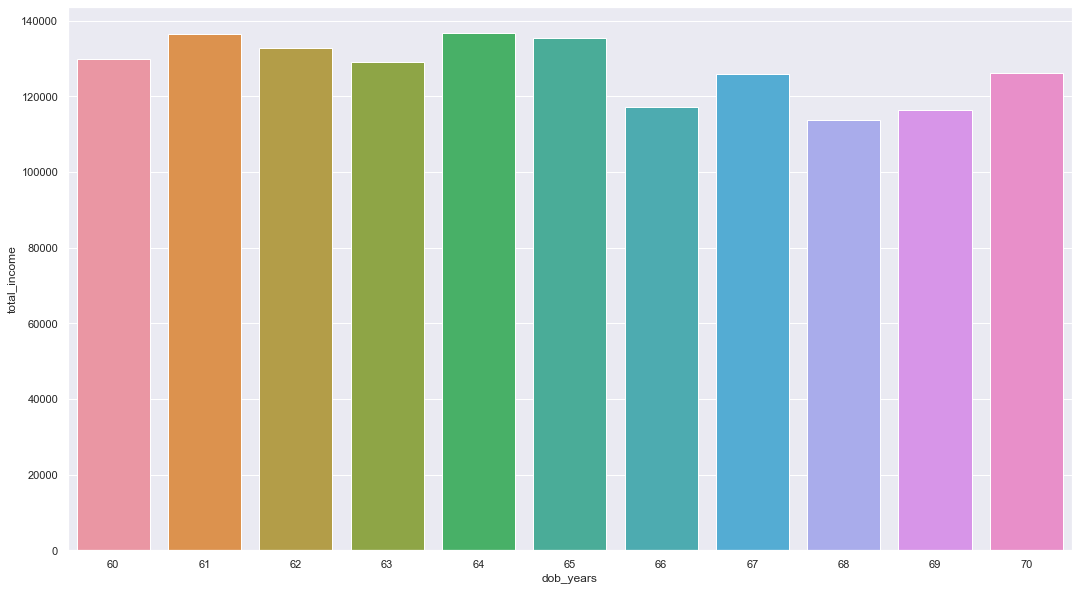

In [366]:
sns.barplot(x = 'dob_years', y = 'total_income', data = childfree_years_60_70, ci=None)
plt.show()

In [367]:
childfree_years_60_70['total_income'].median()

114655.54

Вывод:
    - довольно обеспеченные оказались пенсионеры c медианной месячным доходом в 115 тр

In [368]:
def credit_purpose_status(purpose):
    if 'образован' in purpose:
        return 'Образование'
    if 'авто' in purpose:
        return 'Автомобиль'
    if 'свадь' in purpose:
        return 'Свадьба'
    if 'жиль' or 'недв' in purpose:
        return 'Недвижимость'
    return 'Ошибка классификации'

childfree_years_60_70['credit_purpose'] = childfree_years_60_70['purpose'].apply(credit_purpose_status)

purpose = childfree_years_60_70.pivot_table(index='credit_purpose',
                      columns='debt',
                      values='purpose', aggfunc='count')
purpose['%']=purpose[1]/purpose[0]*100
purpose

<ipython-input-368-1398bab5fdf8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  childfree_years_60_70['credit_purpose'] = childfree_years_60_70['purpose'].apply(credit_purpose_status)


debt,0,1,%
credit_purpose,,,
Автомобиль,449,30,6.681514
Недвижимость,1043,46,4.410355
Образование,405,26,6.419753
Свадьба,222,12,5.405405


Вывод:
    - самый низкий процент возврата у этой категории лиц при приобретении ими недвижимости

### Есть ли зависимость между семейным положением и возвратом кредита в срок?

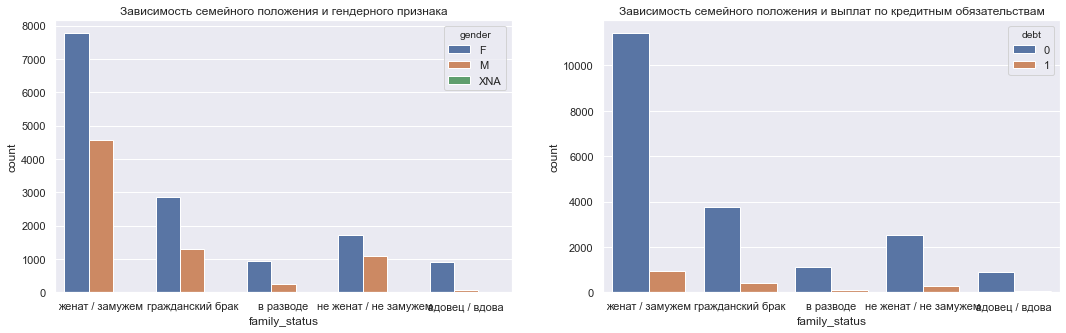

In [382]:
f, ax = plt.subplots(1,2, figsize = (18,5))

sns.countplot('family_status', hue = 'gender', data = df, ax=ax[0])
ax[0].set_title('Зависимость семейного положения и гендерного признака')

sns.countplot('family_status', hue = 'debt', data = df, ax=ax[1])
ax[1].set_title('Зависимость семейного положения и выплат по кредитным обязательствам')
plt.show()

In [311]:
family_status_pivot = df.pivot_table(index = ['family_status'], \
                                columns = ['debt'], \
                                values = 'purpose', aggfunc='count')

family_status_pivot['ratio'] = family_status_pivot[1] / family_status_pivot[0] * 100
family_status_pivot

debt,0,1,ratio
family_status,,,
в разводе,1110,85,7.657658
вдовец / вдова,896,63,7.031250
гражданский брак,3775,388,10.278146
женат / замужем,11413,931,8.157364
не женат / не замужем,2536,274,10.804416


Вывод:
    - Самые низкие показатели у разведенных и вдов — можно предположить, что возвращаемость кредитов зависит в том числе от наличия кормильца или супруга в семье.

In [378]:
woman = df[df['gender']=='F']

In [379]:
woman_pivot = woman.pivot_table(index = ['family_status'], \
                                columns = ['debt'], \
                                values = 'purpose', aggfunc='count')

woman_pivot['ratio'] = woman_pivot[1] / woman_pivot[0] * 100
woman_pivot

debt,0,1,ratio
family_status,,,
в разводе,875,61,6.971429
вдовец / вдова,852,52,6.103286
гражданский брак,2623,233,8.882958
женат / замужем,7234,530,7.326514
не женат / не замужем,1611,118,7.324643


### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [312]:
df['total_income'].quantile([0.25,0.5,0.75])

0.25     88947.35
0.50    135716.88
0.75    195751.90
Name: total_income, dtype: float64

In [313]:
# распределим уровень дохода на 4 уровня:
def income_status(total_income):
    if total_income <= 88947.35:
            return 'Низкий уровень дохода'
    if total_income <= 135716.88:
            return 'Средний уровень дохода'
    if total_income < 195751.90:
            return 'Высокий уровень дохода'
    return 'Сверхвысокий уровень дохода'

In [314]:
df['income_status'] = df['total_income'].apply(income_status)

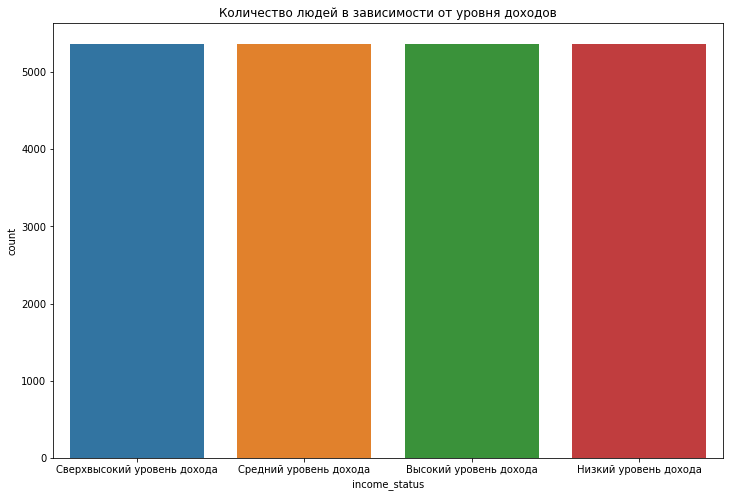

In [324]:
sns.countplot('income_status', data = df)
plt.title('Количество людей в зависимости от уровня доходов')
plt.show()

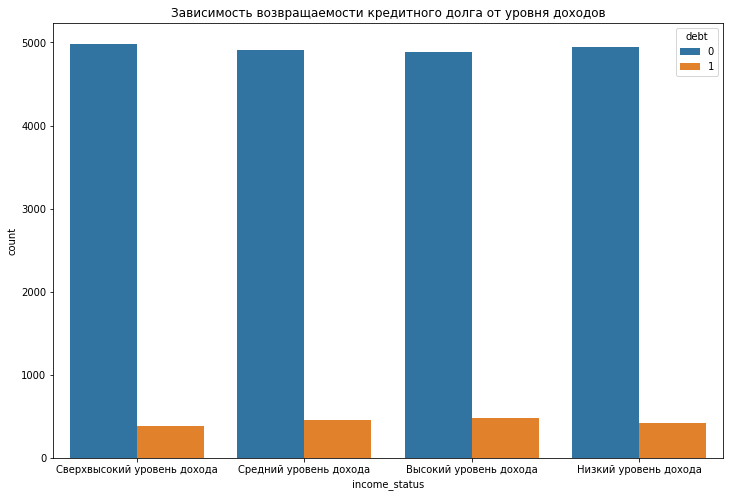

In [323]:
sns.countplot('income_status', hue = 'debt', data = df)
plt.title('Зависимость возвращаемости кредитного долга от уровня доходов')
plt.show()

In [316]:
income_status_pivot = df.pivot_table(index = ['income_status'], \
                                columns = ['debt'], \
                                values = 'purpose', aggfunc='count')

income_status_pivot['ratio'] = income_status_pivot[1] / income_status_pivot[0] * 100
income_status_pivot

debt,0,1,ratio
income_status,,,
Высокий уровень дохода,4883,484,9.911939
Низкий уровень дохода,4949,419,8.466357
Сверхвысокий уровень дохода,4985,383,7.683049
Средний уровень дохода,4913,455,9.261144


Вывод:
    - количество людей в каждой из групп примерно одинаково (это видно их графика выше), хуже всего с возвращаемостью дела обстоят у клиентов с сверхвысокими доходами. Это трудно объяснить... давайте взглянем на что они чаще берут кредит

In [328]:
income_status_high = df[df['income_status']=='Сверхвысокий уровень дохода']

In [329]:
unique_credit_purposes = income_status_high['purpose'].unique().tolist()
string = '; '.join(unique_credit_purposes)

In [357]:
from pymystem3 import Mystem
m = Mystem()
lemmas = m.lemmatize(string)

from collections import Counter
c = Counter()
for w in list(lemmas):
    c[w]+=1
c = dict(c)
sorted_by_value = sorted(c.items(), key=lambda kv: kv[1])
sorted_by_value

[('собственный', 1),
 ('приобретение', 1),
 ('проведение', 1),
 ('подержанный', 1),
 ('со', 1),
 ('сыграть', 1),
 ('ремонт', 1),
 ('сдача', 1),
 ('семья', 1),
 ('подержать', 1),
 ('профильный', 1),
 ('\n', 1),
 ('дополнительный', 2),
 ('заниматься', 2),
 ('сделка', 2),
 ('коммерческий', 2),
 ('жилой', 2),
 ('для', 2),
 ('строительство', 3),
 ('свадьба', 3),
 ('получение', 3),
 ('высокий', 3),
 ('операция', 4),
 ('на', 4),
 ('свой', 4),
 ('с', 5),
 ('жилье', 7),
 ('образование', 9),
 ('автомобиль', 9),
 ('покупка', 10),
 ('недвижимость', 10),
 ('; ', 37),
 (' ', 59)]

Вывод:
    - независимо от уровня дохода кредит берут на одни и теже цели, по всей видимости суммы кредитов положительно коррелируют с уровнем дохода и более обеспеченные люди берут большие суммы. Скорее всего данные заемщики занимаются бизнесом, а в стране с не самой стабильной экономикой это черевато и потому дела в их бизнесе идут не самым лучшим способом от сюда и низкая возвращаемость.

### Как разные цели кредита влияют на его возврат в срок?

In [358]:
def credit_purpose_status(purpose):
    if 'образован' in purpose:
        return 'Образование'
    if 'авто' in purpose:
        return 'Автомобиль'
    if 'свадь' in purpose:
        return 'Свадьба'
    if 'жиль' or 'недв' in purpose:
        return 'Недвижимость'
    return 'Ошибка классификации'

In [359]:
df['credit_purpose'] = df['purpose'].apply(credit_purpose_status)

In [361]:
purpose = df.pivot_table(index='credit_purpose',
                      columns='debt',
                      values='purpose', aggfunc='count')
purpose['%']=purpose[1]/purpose[0]*100
purpose

debt,0,1,%
credit_purpose,,,
Автомобиль,3905,403,10.320102
Недвижимость,10032,782,7.795056
Образование,3644,370,10.153677
Свадьба,2149,186,8.655188


Вывод:
- наименьший возврат кредита связан с приобретением недвижимости, а также проведением свадебных торжеств;

### Общий вывод и рекомендации:

- Сотрудникам банка при выдаче кредита необходимо будет обратить внимание на следующие категории лиц:
   - бездетные семьи, преимущественно пожилого возраста (60-70 лет), кредитной целью которых является приобретение недвижимости (процент возвращаемости кредитов у такой категории - 4%);
   - вдовцы/вдовы, преимущественно женщины (процент возвращаемости кредитов у такой категории - 6%);
   - в разводе, преимущественно женщины (процент возвращаемости кредитов у такой категории - 6,97%);
   - внимательные относиться к выдаче кредитов к лицам с очень высокими доходами, целью кредита которых является приобретение недвижимости (процент возвращаемости кредитов у такой категории - 7,7%). Может быть есть смысл установить для них денежный лимит на приобретение недвижимости. Либо ввести новую кредитную программу на приобретение недвижимости с определенными условиями выгодными банку;
   - также независимо от категории лиц обратить внимание на такие цели приобретения кредита как "недвижимость" и "свадьба":
       - как правило на свадьбу берут кредиты довольно-таки необдуманно, молодоженам, не до финансовых проблем (процент возвращаемости кредитов у такой категории - 8,65%);